# Visualisatoins for SVR 

In [2]:
# import relevant packages 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.model.svm_model import make_matrices
from matplotlib import pyplot as plt 
from scipy.signal import welch 
import seaborn as sns 
import numpy as np 
import pickle 


sns.set_theme()

rcParams = {
    "font.family": "serif",  # use serif/main font for text elements
    'text.usetex': True,
    'font.size': 8,
    'axes.labelsize': 7,
    'axes.titlesize': 9,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 7,
    'axes.labelpad': 1,
    'axes.axisbelow': True,  # draw gridlines below other elements
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        r"\usepackage{url}",            # load additional packages
        r"\usepackage{amsmath,amssymb}",   # unicode math setup
        #  r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
}
plt.rcParams.update(rcParams)

figdir = "../../../figures/methods/"
def savefig(fig, name, width=6, height=4):
    # apply rcParams
    fig.set_size_inches(width, height)
    fig.savefig(figdir + name + ".pdf", bbox_inches='tight')

**$\varepsilon$-tube**

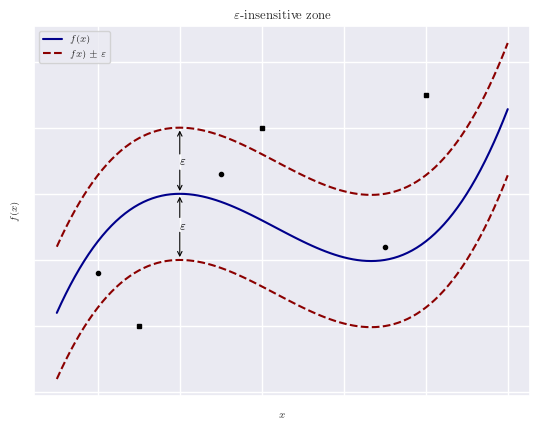

In [2]:
x = np.linspace(-3, 8, 100)
fx = x**3 - 7*x**2   # cubic function
fxp = fx + 50
fxm = fx - 50

# Create the figure
fig, ax = plt.subplots(1, 1)
ax.plot(x, fx, color="darkblue", label = r"$f(x)$")
ax.plot(x, fxp, '--', color="darkred", label = r"$fx) \pm \varepsilon$")
ax.plot(x, fxm, '--', color="darkred")

# Add epsilon symbols
ax.text(0, 22, r"$\varepsilon$", fontsize=9, color="black")
ax.text(0, -27, r"$\varepsilon$", fontsize=9, color="black")

# Add arrows pointing to the red lines
ax.annotate(
    '', xy=(0, fxp[27]), xytext=(0, 28),
    arrowprops=dict(arrowstyle='->', color='black', lw=0.8)
)
ax.annotate(
    '', xy=(0, 0), xytext=(0, 20),
    arrowprops=dict(arrowstyle='->', color='black', lw=0.8)
)

ax.annotate(
    '', xy=(0, fxm[27]), xytext=(0, -27),
    arrowprops=dict(arrowstyle='->', color='black', lw=0.8)
)
ax.annotate(
    '', xy=(0, 0), xytext=(0, -20),
    arrowprops=dict(arrowstyle='->', color='black', lw=0.8)
)

# add points in plot 
ax.plot([1, -2, 5], [15, -60, -40], 'o', color="black", markersize=3)
ax.plot([2, -1, 6], [50, -100, 75], 's', color = "black", markersize=3)

# Labels, title, and show
ax.legend()
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.set_title(r"$\varepsilon$-insensitive zone")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

savefig(fig, "epsilon_insensitive_zone", width = 4, height = 2.5)

### Different Kernel Functions

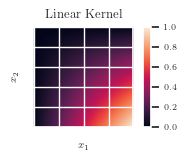

In [75]:
x = np.arange(100)[:, None]
res = np.dot(x, x.T)
res = res / res.max()

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
im = ax.imshow(res)
ax.set_title("Linear Kernel")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='8%', pad=0.1)

fig.colorbar(im, cax=cax, orientation='vertical')
savefig(fig, "svm_linear_kernel", width = 2., height = 1.3)


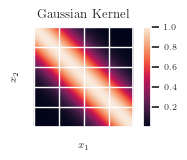

In [76]:
x = np.arange(100)[:, None]
res = np.exp(-0.001 * (x - x.T)**2)
res = res / res.max()

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
im = ax.imshow(res)
ax.set_title("Gaussian Kernel")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='8%', pad=0.1)

fig.colorbar(im, cax=cax, orientation='vertical')

savefig(fig, "svm_gaussian_kernel", width = 2., height = 1.3)


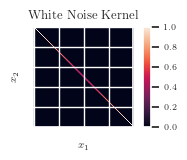

In [77]:
res = np.identity(100)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
im = ax.imshow(res)
ax.set_title("White Noise Kernel")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='8%', pad=0.1)

fig.colorbar(im, cax=cax, orientation='vertical')
savefig(fig, "svm_white_noise_kernel", width = 2, height = 1.3)


### Spectral Domain

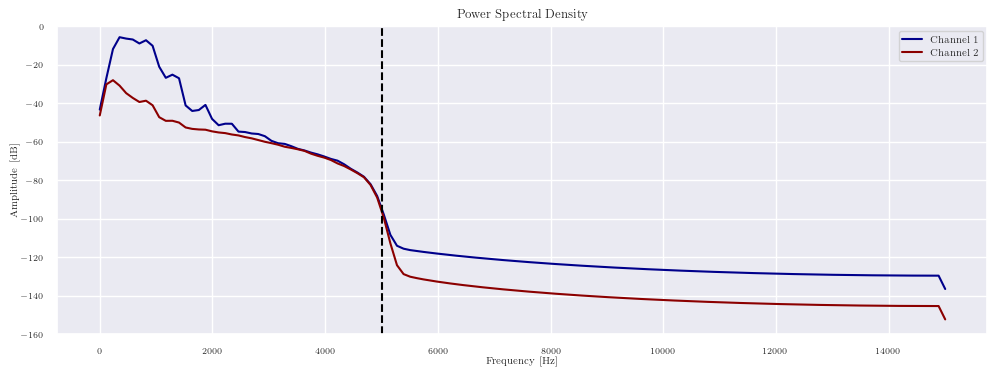

In [17]:
with open("../../src/visualizations/simulated_data.pkl", "rb") as f:
    config = pickle.load(f)
f.close()

X, _ = make_matrices(None, config['filtered_signal'])

f0, Pxx0 = welch(X[0], fs=30000, nperseg=256)
f1, Pxx1 = welch(X[1], fs=30000, nperseg=256)

fig = plt.figure(figsize=(12, 4))
plt.plot(f0, 10*np.log(Pxx0), color="darkblue", label = "Channel 1")
plt.plot(f1, 10*np.log(Pxx1), color="darkred", label = "Channel 2")
plt.legend()
plt.vlines(5000, -160, 0, color="black", linestyle="--")
plt.ylim(-160, 0)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [dB]")
plt.title("Power Spectral Density")
plt.show()

savefig(fig, "svm_psd", width = 6, height = 1.8)